In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as transforms
from scipy.stats import skewtest

plt.rc('ytick', labelsize=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('font', size=20) 

In [2]:
# Load data
df = pd.read_csv("portfolio_metrics_historical_data.csv")
df.head()

,Unnamed: 0,.\Historical_Prices_Csv\usdollar_investing.csv,.\Historical_Prices_Csv\spdr-gold-trust_investing.csv,.\Historical_Prices_Csv\ishares-global-corporate-bond-$_investing.csv,.\Historical_Prices_Csv\db-x-trackers-ii-global-sovereign-5_investing.csv,.\Historical_Prices_Csv\amundi-msci-wrld-ae-c_investing.csv,RETURN,VOLAT
0,0,1.0,0.0,0.0,0.0,0.0,-6.691566,3.273306
1,1,0.8,0.2,0.0,0.0,0.0,1.626032,1.550114
2,2,0.6,0.4,0.0,0.0,0.0,8.572617,3.200567
3,3,0.4,0.6,0.0,0.0,0.0,14.461361,5.037489
4,4,0.2,0.8,0.0,0.0,0.0,19.516803,6.598223


# 2.1.1 Return analysis 

In [3]:
return_values = df.RETURN.values

In [4]:
# Calculate important values
minimum = df.RETURN.values.min()
maximum = df.RETURN.values.max()
mean = df.RETURN.values.mean()
median = np.median(df.RETURN.values)
minimum, maximum, mean, median

(-6.691565515094929, 23.90413337964573, 5.54497688306094, 4.172537246462637)

In [5]:
# Calculate percentage of positive and negative return values
share_negative_values = df.RETURN[df.RETURN < 0].value_counts().sum() / df.RETURN.count()
share_positive_values = df.RETURN[df.RETURN > 0].value_counts().sum() / df.RETURN.count()

share_negative_values, share_positive_values

(0.12698412698412698, 0.873015873015873)

In [6]:
# Calculate bins for histogram in steps of five
def calculate_bins_for_histogram(data):
    return range(5*math.floor(minimum/5), 5*math.ceil(maximum/5)+5,5)


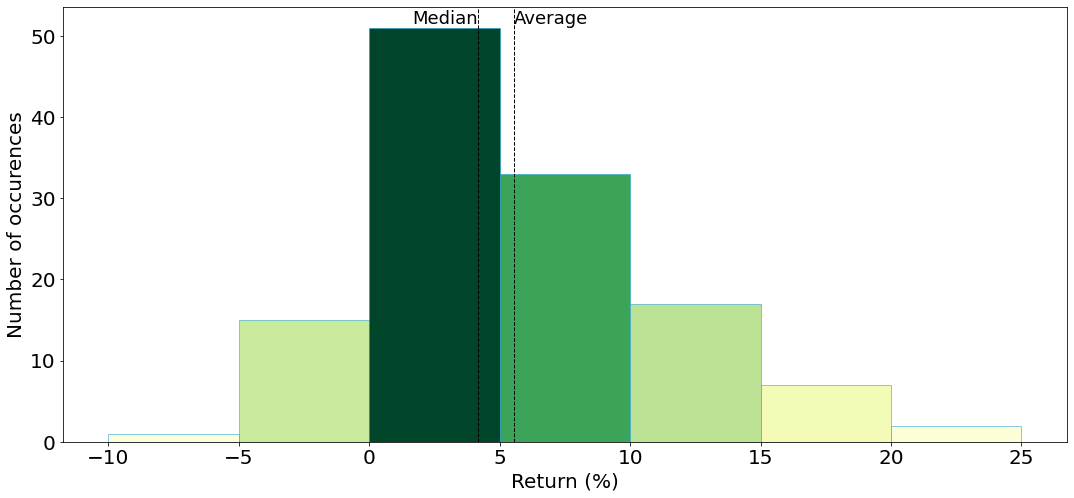

In [7]:
# Plotting the distribution as a histogramm 

bins=calculate_bins_for_histogram(return_values)

plt.figure(figsize=(18,8)) 

n,bins,patches = plt.hist(return_values, bins=bins, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)

nmax = np.max(n)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.text(mean, nmax*1.01, 'Average', fontsize=18)
plt.text(median, nmax*1.01, 'Median', horizontalalignment='right', fontsize=18)

for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', plt.cm.get_cmap('YlGn')(n[i]/max(n)))
    
# plt.title('Histogramm - Return distribution of porfolios', fontsize=20) 
plt.xlabel('Return (%)') 
plt.ylabel('Number of occurences') 

plt.show()

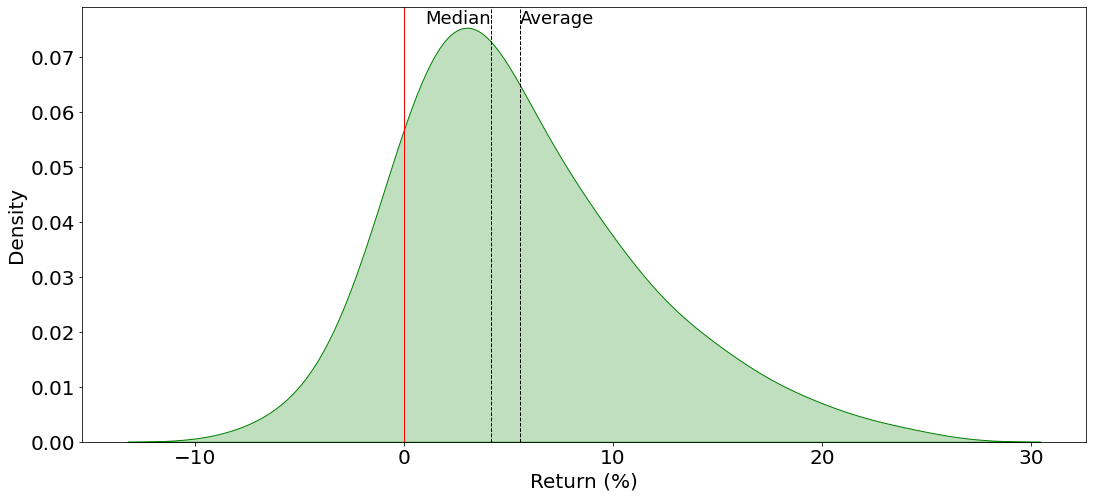

In [8]:
# Plotting the distribution as a Kernel Density Plot
plt.figure(figsize=(18,8)) 
n = sns.kdeplot(data=return_values,color='green',shade=True)

nmax = np.max(n)
plt.axvline(0, color='r', linestyle='-', linewidth=1)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.text(mean, 0.076, 'Average', fontsize=18)
plt.text(median, 0.076, 'Median',  horizontalalignment='right', fontsize=18)

# plt.title('Kernel Density Plot - Return distribution of porfolios', fontsize=16) 
plt.xlabel('Return (%)') 
plt.ylabel('Density') 

plt.show()

In [9]:
def getColorsForBars(values):
    colorsValue = []
    for value in values:
        if value < 0:
            colorsValue.append('red')
        else:
            colorsValue.append('green')


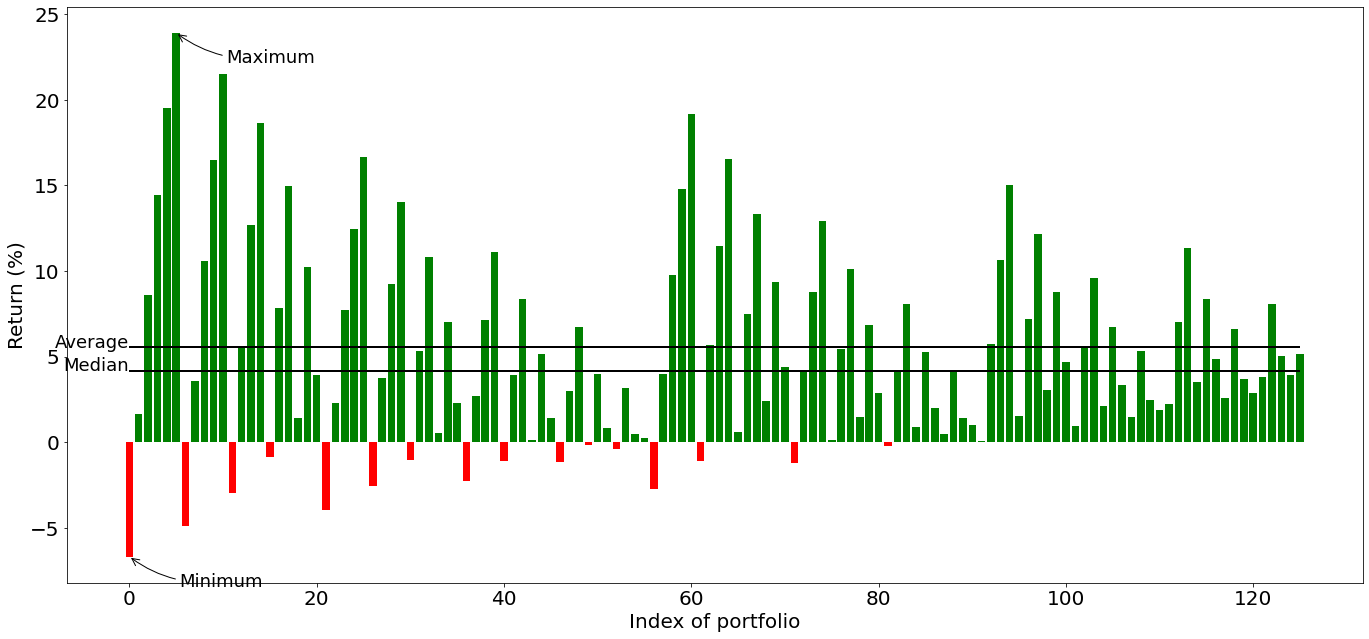

In [10]:
# Plotting all portfolios return as a bar chart

fig = plt.figure(figsize=(18,8))

ax = fig.add_axes([0,0,1,1])
colors = ["red" if i < 0 else "green" for i in return_values]
ax.bar(df.RETURN.index.values,df.RETURN, color=colors)

ax.hlines(y=mean, xmin=df.index.values.min(), xmax=df.index.values.max(), linewidth=2, color='black')
ax.hlines(y=median, xmin=df.index.values.min(), xmax=df.index.values.max(), linewidth=2, color='black')
plt.text(0, mean, 'Average', horizontalalignment='right', fontsize=18)
plt.text(0, median, 'Median',  horizontalalignment='right', fontsize=18)


ax.annotate("Minimum", xy=(df[df.RETURN==minimum].index.values, minimum),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),fontsize=18)

ax.annotate("Maximum", xy=(df[df.RETURN==maximum].index.values, maximum),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),fontsize=18)

# plt.title('Bar chart - Returns', fontsize=16) 
plt.xlabel('Index of portfolio') 
plt.ylabel('Return (%)') 

plt.show()

In [11]:
# Calculate skewness
skewness = df.RETURN.skew()
skewness

0.775185637927168

# 2.1.2 Risk vs return analysis

### Correlation coefficient 

In [13]:
corr_coeff = df['RETURN'].corr(df['VOLAT'])
corr_coeff

0.7021282549464515

### Risk-return scatter plot

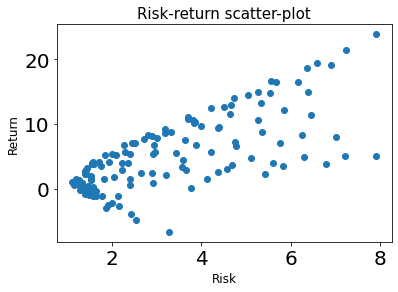

In [14]:
plt.scatter(df['VOLAT'], df['RETURN'])

# Ajouter un titre et des étiquettes d'axes
plt.title('Risk-return scatter-plot', fontsize=15)
plt.xlabel('Risk', fontsize = 12)
plt.ylabel('Return', fontsize = 12)

# Afficher le graphique de dispersion
plt.show()

### Linear Regression 

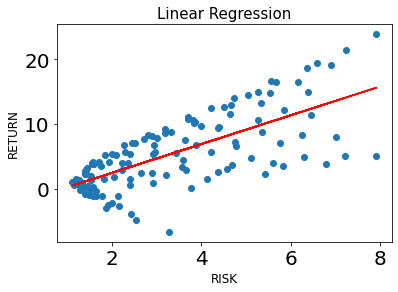

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df[['VOLAT']], df['RETURN'])
return_pred = reg.predict(df[['VOLAT']])

plt.title('Linear Regression', fontsize = 15)
plt.scatter(df['VOLAT'], df['RETURN'])
plt.plot(df['VOLAT'], return_pred, color='red')

plt.xlabel('RISK', fontsize = 12)
plt.ylabel('RETURN', fontsize = 12)

plt.show()

In [6]:
from sklearn.metrics import r2_score, mean_squared_error

# determination coefficient 
r_squared = reg.score(df[['VOLAT']], df['RETURN'])

# MSE 
y_pred = reg.predict(df[['VOLAT']])
mse = mean_squared_error(df['RETURN'], return_pred)

print('Determination Coefficient (R²) :', r_squared)
print('Mean square error (MSE) :', mse)

Determination Coefficient (R²) : 0.4929840863941489
Mean square error (MSE) : 16.654725090108503


### Group portefolios by risk

In [16]:
df['risk_group'] = pd.qcut(df['VOLAT'], q=3, labels=['low', 'medium', 'high'])

In [17]:
df.head()

,Unnamed: 0,.\Historical_Prices_Csv\usdollar_investing.csv,.\Historical_Prices_Csv\spdr-gold-trust_investing.csv,.\Historical_Prices_Csv\ishares-global-corporate-bond-$_investing.csv,.\Historical_Prices_Csv\db-x-trackers-ii-global-sovereign-5_investing.csv,.\Historical_Prices_Csv\amundi-msci-wrld-ae-c_investing.csv,RETURN,VOLAT,risk_group
0,0,1.0,0.0,0.0,0.0,0.0,-6.691566,3.273306,medium
1,1,0.8,0.2,0.0,0.0,0.0,1.626032,1.550114,low
2,2,0.6,0.4,0.0,0.0,0.0,8.572617,3.200567,medium
3,3,0.4,0.6,0.0,0.0,0.0,14.461361,5.037489,high
4,4,0.2,0.8,0.0,0.0,0.0,19.516803,6.598223,high


In [18]:
low_return = df[df['risk_group'] == 'low']['RETURN'].mean()
medium_return = df[df['risk_group'] == 'medium']['RETURN'].mean()
high_return = df[df['risk_group'] == 'high']['RETURN'].mean()

In [19]:
print('Average return for low risk portfolios: {}'.format(low_return))
print('Average return for medium risk portfolios: {}'.format(medium_return))
print('Average return for high risk portfolios: {}'.format(high_return))

Average return for low risk portfolios: 1.3952188237856509
Average return for medium risk portfolios: 4.824720048838195
Average return for high risk portfolios: 10.414991776558974


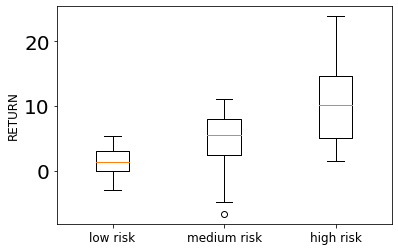

In [20]:
fig, ax = plt.subplots()
ax.boxplot([df[df['risk_group']=='low']['RETURN'], df[df['risk_group']=='medium']['RETURN'], df[df['risk_group']=='high']['RETURN']])
ax.set_xticklabels(['low risk', 'medium risk', 'high risk'], fontsize = 12)
ax.set_ylabel('RETURN', fontsize = 12)
plt.show()